In [1]:
# %matplotlib qt

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import sys 
import mne

In [82]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
import pandas as pd

In [18]:
# ------------------------Functions--------------------------------------
# Data load Function
def load_data(id,data_pth):
    imag = loadmat(os.path.join(data_pth,'{}_im_t_h.mat'.format(id)))
    overt = loadmat(os.path.join(data_pth,'{}_mot_t_h.mat'.format(id)))
    return imag,overt

def mne_conv(imag, overt, sampling_freq, scaling_f, n_channels):
    # Creating Info MNE Object
    mne_info= mne.create_info(n_channels, sampling_freq)#, ch_types=['ecog']*n_channels)

    # Notch Filtering 
    filtered_data_Imag = []
    filtered_data_Overt = []
    for i in range(n_channels):
        channel_Imagdata = imag['data'][:,i] * scaling_f
        channel_Overtdata = overt['data'][520:,i] * scaling_f

        filtered_Imag = mne.filter.notch_filter(channel_Imagdata, sampling_freq, np.arange(60,241,60))
        filtered_Overt = mne.filter.notch_filter(channel_Overtdata, sampling_freq, np.arange(60,241,60))

        filtered_data_Imag.append(filtered_Imag)
        filtered_data_Overt.append(filtered_Overt)

    # Creating MNE objects 
    mne_Overt = mne.io.RawArray(filtered_data_Overt, mne_info)
    mne_Imag = mne.io.RawArray(filtered_data_Imag, mne_info)
    
    # Stimulation events
    stim_events_overt = np.array([np.array([i, 0, stim[0]]) for i, stim in enumerate(overt['stim']) if overt['stim'][i-1]<stim]) # Stimulations
    stim_events_imag = np.array([np.array([i, 0, stim[0]]) for i, stim in enumerate(imag['stim']) if imag['stim'][i-1]<stim]) # Stimulations
    for ch in mne_Overt.ch_names:
        mne_Overt.add_events(stim_events_overt, stim_channel = ch)
        mne_Imag.add_events(stim_events_imag, stim_channel = ch)
    
    return mne_info, mne_Imag,mne_Overt

def get_epochs_data(hilbert_freq_mne, event_id,stim_events):
    epochs_mne_data = mne.Epochs(hilbert_freq_mne.copy(), events=stim_events, tmin=0.25, tmax=3, baseline = None)[event_id]
    return epochs_mne_data

In [19]:


# -----------------variables--------------------
freq_bands = { 
    'beta1' : (12, 18),
    'beta2' : (18, 24),
    'beta3' : (24, 30),
    'gamma1' :(30, 36),
    'gamma2' :(36, 42),
    'gammaH' :(70, 150)
}
sampling_freq = 1000
scaling_f = 0.0298



In [20]:
# Path variables
data_pth = os.path.join(os.getcwd(),'sourcedata','imagery_basic','data')
participants = ['jc','jm','rh']

In [24]:
imag,overt=load_data(participants[0],data_pth) # Load per participant --- example: jc
n_channels = imag['data'].shape[1]

In [25]:

# Define MNE objects
mne_Info, mne_Imag ,mne_Overt= mne_conv(imag, overt, 
                                        sampling_freq, scaling_f, n_channels) # Load data into mne object

# Get epoch data
stim_events = np.array([np.array([i, 0, stim[0]])
                        for i, stim in enumerate(overt['stim']) if overt['stim'][i-1]<stim]) # Stimulations
for mne_obj in [mne_Imag,mne_Overt]:
    for ch in mne_obj.ch_names:
        mne_obj.add_events(stim_events, stim_channel = ch)

hand_epochs_Img = get_epochs_data(mne_Imag.copy(), '12', stim_events)
hand_epochs_Overt = get_epochs_data(mne_Overt.copy(), '12', stim_events)

tng_epochs_Img = get_epochs_data(mne_Imag.copy(), '11', stim_events)
tng_epochs_Overt = get_epochs_data(mne_Overt.copy(), '11', stim_events)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband att

- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop fi

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
--

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Setting

In [53]:

def process_epochs(epoch_data, ch_numbers = [19, 20, 21, 26, 27, 28, 35, 36], select_channel=True):
    psd_out = mne.time_frequency.psd_multitaper(epoch_data , fmin=12, fmax=150, n_jobs=1, picks = mne_Imag.ch_names)
    psds = psd_out[0]
    freqs = psd_out[1]

    psds = 10 * np.log10(psds)  # convert to dB
    psds_mean = psds.mean(0).mean(0)
    psds_std = psds.mean(0).std(0)
    psds_shape = np.shape(psds)

    psds_beta1_all = []
    psds_beta2_all = []
    psds_beta3_all = []
    psds_gamma1_all = []
    psds_gamma2_all = []
    psds_gammaH_all = []

    for epoch_ind in range(psds_shape[0]):
        psds_beta1_ch = []
        psds_beta2_ch = []
        psds_beta3_ch = []
        psds_gamma1_ch = []
        psds_gamma2_ch = []
        psds_gammaH_ch = []
        for ch in range(psds_shape[1]):
            psds_beta1_ch.append(np.sum(psds[epoch_ind,ch,0:16]**2))
            psds_beta2_ch.append(np.sum(psds[epoch_ind,ch,16:32]**2))
            psds_beta3_ch.append(np.sum(psds[epoch_ind,ch,32:49]**2))
            psds_gamma1_ch.append(np.sum(psds[epoch_ind,ch,49:65]**2))
            psds_gamma2_ch.append(np.sum(psds[epoch_ind,ch,65:82]**2))
            psds_gammaH_ch.append(np.sum(psds[epoch_ind,ch,159:]**2))
        psds_beta1_all.append(np.array(psds_beta1_ch))
        psds_beta2_all.append(np.array(psds_beta2_ch))
        psds_beta3_all.append(np.array(psds_beta3_ch))
        psds_gamma1_all.append(np.array(psds_gamma1_ch))
        psds_gamma2_all.append(np.array(psds_gamma2_ch))
        psds_gammaH_all.append(np.array(psds_gammaH_ch))

    psds_beta1_arr = np.array(psds_beta1_all)
    psds_beta2_arr = np.array(psds_beta2_all)
    psds_beta3_arr = np.array(psds_beta3_all)
    psds_gamma1_arr = np.array(psds_gamma1_all)
    psds_gamma2_arr = np.array(psds_gamma2_all)
    psds_gammaH_arr = np.array(psds_gammaH_all)
    if select_channel:
        return psds_beta1_arr[:, ch_numbers], psds_beta2_arr[:, ch_numbers], psds_beta3_arr[:, ch_numbers], psds_gamma1_arr[:, ch_numbers], psds_gamma2_arr[:, ch_numbers], psds_gammaH_arr[:, ch_numbers]
    else:
        return psds_beta1_arr, psds_beta2_arr, psds_beta3_arr, psds_gamma1_arr, psds_gamma2_arr, psds_gammaH_arr


In [54]:
ch_numbers = [19, 20, 21, 26, 27, 28, 35, 36]

In [55]:
## hand psds
beta1_hand_img, beta2_hand_img, beta3_hand_img, gamma1_hand_img, gamma2_hand_img, gammaH_hand_img = process_epochs(
    hand_epochs_Img, ch_numbers)
beta1_hand_overt, beta2_hand_overt, beta3_hand_overt, gamma1_hand_overt, gamma2_hand_overt, gammaH_hand_overt = process_epochs(
    hand_epochs_Overt, ch_numbers)

## tongue psds
beta1_tng_img, beta2_tng_img, beta3_tng_img, gamma1_tng_img, gamma2_tng_img, gammaH_tng_img = process_epochs(
    tng_epochs_Img, ch_numbers)
beta1_tng_overt, beta2_tng_overt, beta3_tng_overt, gamma1_tng_overt, gamma2_tng_overt, gammaH_tng_overt = process_epochs(
    tng_epochs_Overt, ch_numbers)

Using data from preloaded Raw for 30 events and 2751 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 30 events and 2751 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 30 events and 2751 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 30 events and 2751 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


In [57]:
beta1_tng_img.min(), beta1_tng_img.max(), gammaH_tng_img.min(), gammaH_tng_img.max()

(18853.36257411116, 43750.78014929575, 129701.80441826861, 187183.91250299622)

In [62]:
beta1_tng_img[:, 1]

array([30892.1871953 , 32838.30684384, 32272.21311808, 30336.59947408,
       34444.76044585, 32413.78615628, 31634.23894695, 26962.05922814,
       33236.78438245, 30555.64663292, 30156.47400844, 33187.08138274,
       31821.9524724 , 26247.41209201, 31679.81617288, 29624.34514678,
       29310.03360038, 30537.28210958, 32106.80643602, 32279.79944766,
       28775.38039473, 31421.80849391, 30127.76969981, 32047.32834407,
       30616.89867704, 29509.75611821, 29820.52611636, 30282.29474996,
       29521.13842042, 34492.62917364])

In [69]:
def create_df(beta1, beta2, beta3, gamma1, gamma2, gammaH, motor_info, target, bands):
    processed_df = pd.DataFrame()
    for i in range(8):
        processed_df[bands[0] + '_channel_' + str(ch_numbers[i])] = beta1[:, i]
        processed_df[bands[1] + '_channel_' + str(ch_numbers[i])] = beta2[:, i]
        processed_df[bands[2] + '_channel_' + str(ch_numbers[i])] = beta3[:, i]
        processed_df[bands[3] + '_channel_' + str(ch_numbers[i])] = gamma1[:, i]
        processed_df[bands[4] + '_channel_' + str(ch_numbers[i])] = gamma2[:, i]
        processed_df[bands[5] + '_channel_' + str(ch_numbers[i])] = gammaH[:, i]
    processed_df['label'] = target
    processed_df['motor_info'] = motor_info
    return processed_df

In [70]:
processed_df = pd.DataFrame()

In [71]:
# processed_df.append()

In [74]:

bands = ['beta1', 'beta2', 'beta3', 'gamma1', 'gamma2', 'gammaH']

processed_df = processed_df.append([create_df(beta1_hand_img, beta2_hand_img, beta3_hand_img,
          gamma1_hand_img, gamma2_hand_img, gammaH_hand_img,
         "hand","img",bands),
                                    create_df(beta1_hand_overt, beta2_hand_overt, beta3_hand_overt,
          gamma1_hand_overt, gamma2_hand_overt, gammaH_hand_overt,
         "hand","overt",bands),
create_df(beta1_tng_img, beta2_tng_img, beta3_tng_img,
          gamma1_tng_img, gamma2_tng_img, gammaH_tng_img,
         "tng","img",bands),
create_df(beta1_tng_overt, beta2_tng_overt, beta3_tng_overt,
          gamma1_tng_overt, gamma2_tng_overt, gammaH_tng_overt,
         "tng","overt",bands)], ignore_index=True)

/var/folders/jb/mn8159q17rbcnfb4644vw23w0000gn/T/ipykernel_75002/1232902588.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_df = processed_df.append([create_df(beta1_hand_img, beta2_hand_img, beta3_hand_img,


In [76]:
processed_df.to_csv("processed_df.csv", index=False)

In [79]:
processed_df['label_encoded'] = processed_df['label'].apply(lambda x: 0 if x=='img' else 1)

In [88]:
columns= processed_df.columns[:-3]
columns

Index(['beta1_channel_19', 'beta2_channel_19', 'beta3_channel_19',
       'gamma1_channel_19', 'gamma2_channel_19', 'gammaH_channel_19',
       'beta1_channel_20', 'beta2_channel_20', 'beta3_channel_20',
       'gamma1_channel_20', 'gamma2_channel_20', 'gammaH_channel_20',
       'beta1_channel_21', 'beta2_channel_21', 'beta3_channel_21',
       'gamma1_channel_21', 'gamma2_channel_21', 'gammaH_channel_21',
       'beta1_channel_26', 'beta2_channel_26', 'beta3_channel_26',
       'gamma1_channel_26', 'gamma2_channel_26', 'gammaH_channel_26',
       'beta1_channel_27', 'beta2_channel_27', 'beta3_channel_27',
       'gamma1_channel_27', 'gamma2_channel_27', 'gammaH_channel_27',
       'beta1_channel_28', 'beta2_channel_28', 'beta3_channel_28',
       'gamma1_channel_28', 'gamma2_channel_28', 'gammaH_channel_28',
       'beta1_channel_35', 'beta2_channel_35', 'beta3_channel_35',
       'gamma1_channel_35', 'gamma2_channel_35', 'gammaH_channel_35',
       'beta1_channel_36', 'beta2_channel

In [144]:
selected_columns = [col for col in columns if 'gammaH' not in col]
selected_columns

['beta1_channel_19',
 'beta2_channel_19',
 'beta3_channel_19',
 'gamma1_channel_19',
 'gamma2_channel_19',
 'beta1_channel_20',
 'beta2_channel_20',
 'beta3_channel_20',
 'gamma1_channel_20',
 'gamma2_channel_20',
 'beta1_channel_21',
 'beta2_channel_21',
 'beta3_channel_21',
 'gamma1_channel_21',
 'gamma2_channel_21',
 'beta1_channel_26',
 'beta2_channel_26',
 'beta3_channel_26',
 'gamma1_channel_26',
 'gamma2_channel_26',
 'beta1_channel_27',
 'beta2_channel_27',
 'beta3_channel_27',
 'gamma1_channel_27',
 'gamma2_channel_27',
 'beta1_channel_28',
 'beta2_channel_28',
 'beta3_channel_28',
 'gamma1_channel_28',
 'gamma2_channel_28',
 'beta1_channel_35',
 'beta2_channel_35',
 'beta3_channel_35',
 'gamma1_channel_35',
 'gamma2_channel_35',
 'beta1_channel_36',
 'beta2_channel_36',
 'beta3_channel_36',
 'gamma1_channel_36',
 'gamma2_channel_36']

In [145]:
# psds.reshape(())

In [146]:
# hilbert_overt

## Apply models

1. Train test split 
2. Takes input, output(optional), model ->e.g, Kmeans, RandomForest, SVM
3. Evaluation 
    -> Confusion (TPR, FPR)
    -> Tree based-> feature importance
    -> ROC-AUC
    


In [147]:
# processed_data, labels = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        processed_df[selected_columns], processed_df['label_encoded'], random_state=42, test_size=0.2)
n_train_samples = len(X_train)
n_test_samples = len(X_test)
n_features = X_train.shape[1]

In [148]:
def build_fit_model(X_train, y_train=None, model='kmeans', **kwargs):
    if model=='kmeans':
        kmeans_model = KMeans(**kwargs)
        kmeans_model.fit(X_train)
        return kmeans_model
    elif model=='gmm':
        gmm_model = GaussianMixture( **kwargs)
        gmm_model.fit(X_train)
        return gmm_model
    elif model=='lr':
        clf_model = LogisticRegression(**kwargs)
        clf_model.fit(X_train, y_train)
        return clf_model
    elif model=='svm':
        clf_model = SVC(**args)
        clf_model.fit(X_train, y_train)
        return lr_model
    elif model=='random_forest':
        clf_model = RandomForestClassifier(**kwargs)
        clf_model.fit(X_train, y_train)
        return clf_model
    elif model=='decision_tree':
        clf_model = DecisionTreeClassifier(**kwargs)
        clf_model.fit(X_train, y_train)
        return clf_model

In [149]:
X_train.shape

(96, 40)

In [150]:
global n_components
global n_clusters
global n_classes
global truth, n_samples

def create_arguments(dataset_type = 'test', n_cls=2):
    n_components=n_clusters=n_classes=n_cls
    if dataset_type=='train':
        truth, n_samples = train_truth, n_train_samples 
    else:
        truth, n_samples = test_truth, n_test_samples 
    return truth, n_samples, n_components, n_clusters, n_classes

In [151]:
# n_clusters
truth, n_samples, n_components, n_clusters, n_classes = create_arguments('test', n_cls=2)
n_clusters

2

## Clustering Evaluation

In [152]:
# Prep
model_name='kmeans'
# creating mapping between cluster labels and actual labels
test_truth = np.empty(n_test_samples)
train_truth = np.empty(n_train_samples)

create_arguments('train', n_cls=2)

if model_name=='gmm':
    model = build_fit_model(X_train, model=model_name, n_components=n_components)
else:
    model = build_fit_model(X_train, model=model_name, n_clusters=n_clusters)

labels = model.predict(X_test)
labels_matched = np.empty_like(labels)




data  = np.empty((n_samples, n_features))
np.random.seed(42)

for i,mu in enumerate(np.random.choice([0,1], n_samples, replace=True)):
    truth[i]  = mu
    data[i,:] = np.random.normal(loc=mu, scale=1.5, size=n_features)

# For each cluster label...
for k in np.unique(labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((labels==k)*(truth==t)) for t in np.unique(truth)]
    labels_matched[labels==k] = np.unique(truth)[np.argmax(match_nums)]

In [153]:
labels

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0], dtype=int32)

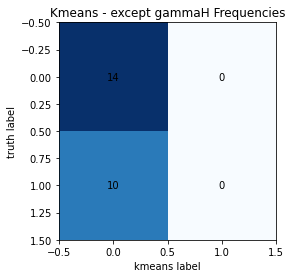

<Figure size 432x288 with 0 Axes>

In [155]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth, labels_matched)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.title("Kmeans - except gammaH Frequencies")
plt.show()
plt.savefig('kmeansconfus_allfreq')

## Classification Evaluation

In [156]:
model_name = 'random_forest'
classifier = build_fit_model(X_train, y_train, model=model_name)


In [157]:
# x_pred_score

### Confusion Matrix

/Users/lavanyamk/Virtual_Envs/common_python3_venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


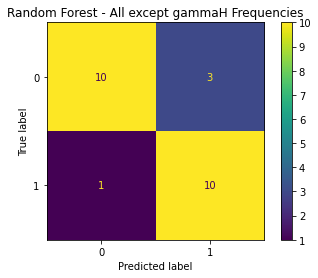

In [159]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.title("Random Forest - All except gammaH Frequencies")
plt.show()
# plt.savefig('rfconfus_allfreq.png')

/Users/lavanyamk/Virtual_Envs/common_python3_venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


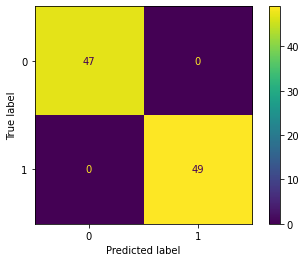

In [160]:
plot_confusion_matrix(classifier, X_train, y_train)  
plt.show()

### Feature importance

In [163]:
features= selected_columns

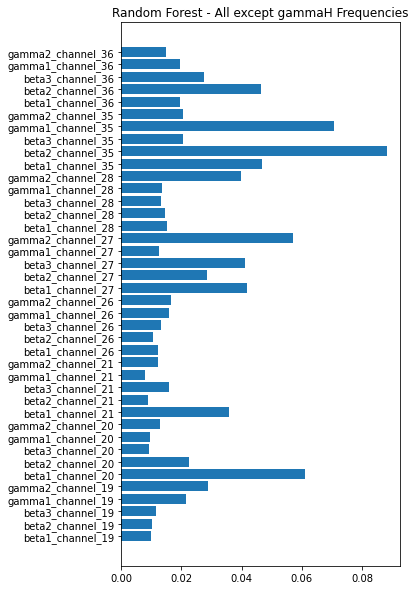

In [165]:
plt.figure(figsize=(5,10))
plt.title("Random Forest - All except gammaH Frequencies")
plt.barh(features, classifier.feature_importances_)

plt.show()
# plt.savefig("feature_importance_rf.png")

### ROC AUC curve

In [166]:
len(y_train)

96

/Users/lavanyamk/Virtual_Envs/common_python3_venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


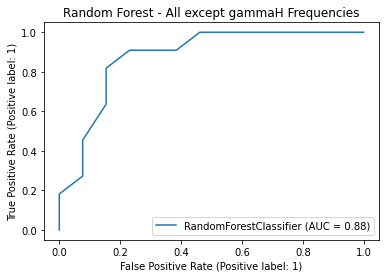

In [168]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

metrics.plot_roc_curve(classifier, X_test, y_test) 
plt.title("Random Forest - All except gammaH Frequencies")
plt.show()
# plt.savefig('rfroc_allfreq')